In [2]:
from transformers import pipeline

In [3]:
classifier=pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [4]:
classifier("I love the camera quality")

[{'label': 'POSITIVE', 'score': 0.9998762607574463}]

In [6]:
classifier("I don't like the camera quality")

[{'label': 'NEGATIVE', 'score': 0.9980308413505554}]

In [7]:
classifier("I had so much fun in Machine Learning Class!")

[{'label': 'POSITIVE', 'score': 0.9992608428001404}]

In [9]:
classifier=pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


In [16]:
sentence=[
    "It was a lot to process.",
    "The concepts are difficult to understand.",
    "I love this activity",
    "I didn't understand but still it was  fun",
    "It was really fun but I didn't understand"
]

In [17]:
classifier(sentence)

[{'label': 'NEGATIVE', 'score': 0.9994008541107178},
 {'label': 'NEGATIVE', 'score': 0.9994993209838867},
 {'label': 'POSITIVE', 'score': 0.9989109039306641},
 {'label': 'POSITIVE', 'score': 0.9976996779441833},
 {'label': 'NEGATIVE', 'score': 0.999371349811554}]

In [18]:
sentence=[
"It was a lot to process.",
"The concepts are difficalt to understand.",
"I love this activity.",
"I didn/t understatnt but still it was fun."
]

In [19]:
classifier(sentence)

[{'label': 'NEGATIVE', 'score': 0.9994008541107178},
 {'label': 'NEGATIVE', 'score': 0.999427080154419},
 {'label': 'POSITIVE', 'score': 0.998880922794342},
 {'label': 'POSITIVE', 'score': 0.9986574649810791}]

In [20]:
summarizer=pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu


In [22]:
content="""One night, King Aryan had a strange dream. He saw a dark shadow engulfing his kingdom, crops withering, and people crying out for help. A mysterious figure in a black cloak appeared and said, "Your kingdom’s fate lies beyond the Eastern Mountains. Seek the truth before the shadow consumes all."

Disturbed by the dream, Aryan called his council of ministers the next morning. “My dream felt so real,” he said. “Something dark is approaching our land. I must discover the truth.”

The ministers advised him not to worry—it was only a dream. But Aryan’s heart told him otherwise. He decided to seek guidance from the kingdom’s wise sage, Rishi Varun."""

In [23]:
summarizer(content)

[{'summary_text': ' King Aryan saw a dark shadow engulfing his kingdom, crops withering, and people crying out for help . A mysterious figure in a black cloak appeared and said, "Your kingdom’s fate lies beyond the Eastern Mountains" Aryan decided to seek guidance from the kingdom\'s wise sage, Rishi Varun .'}]

In [25]:
summarizer(content,max_length=56)

[{'summary_text': ' King Aryan saw a dark shadow engulfing his kingdom, crops withering, and people crying out for help . A mysterious figure in a black cloak appeared and said, "Your kingdom’s fate lies beyond the Eastern Mountains" Aryan decided to seek guidance'}]

In [ ]:
###  Nexus-> Upload a doc -> Extract the data and do summarization with pipeline only

Nexus -> get the code

In [ ]:
!pip install PyPDF2 transformers  # Install necessary libraries

In [29]:
!pip install PyPDF2 transformers

import PyPDF2
from transformers import pipeline, AutoTokenizer

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
        return text

# Path to your PDF file
pdf_path = "/content/Mentor_17 years_AI.pdf"  # Replace with the actual path

# Extract text from PDF
pdf_text = extract_text_from_pdf(pdf_path)

# Initialize the summarization pipeline and tokenizer # This is the important part.
summarizer = pipeline("summarization", model="facebook/bart-large-cnn") # Use a specific model.
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn") # Use a specific tokenizer.


# Summarize the extracted text, handling unknown tokens
# Truncate the input text to the model's maximum input length.
inputs = tokenizer(pdf_text, return_tensors="pt", truncation=True, max_length=1024)
summary_ids = summarizer.model.generate(inputs["input_ids"], attention_mask=inputs["attention_mask"], max_length=200, min_length=50)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)  # Decode the summary IDs.


# Print the summary
print(summary)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


16 years of experience as Corporate Trainer (Artificial Intelligence /Analytics/Power BI/Tableau /S inference and                 creation of data insights as a Data Scientist. Strong understanding of Predictive modeling andMachine learning Algorithms – Linear Regression, KNN, Naïve Bayes and Support Vector Machines.


In [30]:
image_classifier=pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [32]:
from PIL import Image

In [33]:
image=Image.open("/content/cat2.jpg")

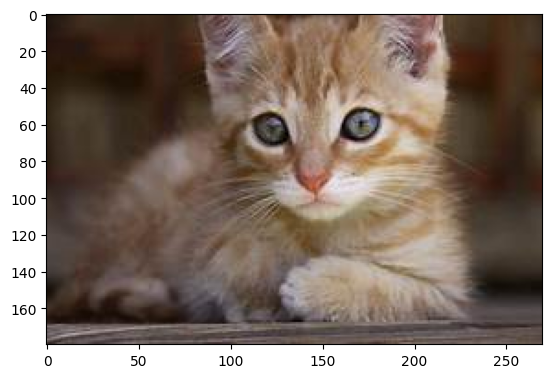

In [41]:
plt.imshow(image)

In [34]:
image_classifier(image)

[{'label': 'tabby, tabby cat', 'score': 0.39016810059547424},
 {'label': 'Egyptian cat', 'score': 0.3533356487751007},
 {'label': 'tiger cat', 'score': 0.18507172167301178},
 {'label': 'lynx, catamount', 'score': 0.02726764790713787},
 {'label': 'Persian cat', 'score': 0.006706152576953173}]

In [36]:
import requests
from PIL import Image
onlineImage = Image.open(requests.get("http://images.cocodataset.org/val2017/000000039769.jpg", stream=True).raw)

In [37]:
image_classifier(onlineImage)

[{'label': 'Egyptian cat', 'score': 0.9374414682388306},
 {'label': 'tabby, tabby cat', 'score': 0.03844264894723892},
 {'label': 'tiger cat', 'score': 0.01441141590476036},
 {'label': 'lynx, catamount', 'score': 0.0032743250485509634},
 {'label': 'Siamese cat, Siamese', 'score': 0.0006795924273319542}]

In [39]:
import matplotlib.pyplot as plt

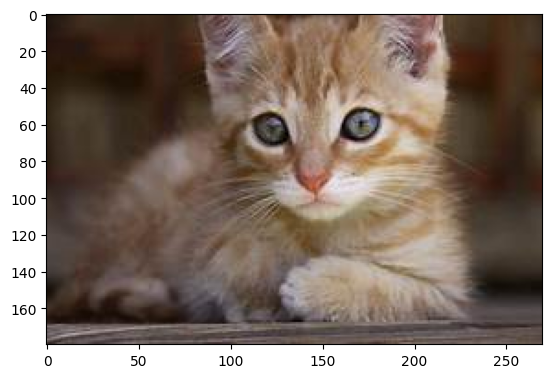

In [40]:
plt.imshow(image)

In [42]:
question_answer=pipeline("vqa")

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/470M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [47]:
question_answer(image=image,question="How many eyes are in the image")

[{'score': 0.9324789643287659, 'answer': '2'},
 {'score': 0.026306385174393654, 'answer': '1'},
 {'score': 0.020612606778740883, 'answer': '3'},
 {'score': 0.01695277728140354, 'answer': '4'},
 {'score': 0.0007834347197785974, 'answer': '6'}]

In [48]:
generator=pipeline("text-generation")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [52]:
generator("In this generative ai session,we",max_length=150)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this generative ai session,we will focus on learning the underlying algorithm, and how those algorithms perform in real world situations. We will show how to develop and use the algorithm in the following scenarios:\n\nWhen a web framework is developed from a simple-to-understand, cross-platform library such as OpenSource that can be used as a starting point for creating a single-node virtual machine, it will be able to process hundreds billion images every second, at a speed that makes Google Play a "fast and scalable" platform.\n\nWhen a web app is not built on top of OpenSUSE\'s Openstack engine, it will be able to process several hundreds billion images, at a speed that makes Google Play a'}]

In [54]:
generator("The man is working as a ",max_length=10)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'The man is working as a utes on what'}]

In [55]:
ner=pipeline("ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu


In [60]:
ner("Gandhi is the father of India")

[{'entity': 'I-PER',
  'score': 0.99579775,
  'index': 1,
  'word': 'Gandhi',
  'start': 0,
  'end': 6},
 {'entity': 'I-LOC',
  'score': 0.99837816,
  'index': 6,
  'word': 'India',
  'start': 24,
  'end': 29}]

In [62]:
ner("Mahatma Gandhi started Quit India Movement")

[{'entity': 'I-PER',
  'score': 0.9982716,
  'index': 1,
  'word': 'Ma',
  'start': 0,
  'end': 2},
 {'entity': 'I-PER',
  'score': 0.9759916,
  'index': 2,
  'word': '##hat',
  'start': 2,
  'end': 5},
 {'entity': 'I-PER',
  'score': 0.7372379,
  'index': 3,
  'word': '##ma',
  'start': 5,
  'end': 7},
 {'entity': 'I-PER',
  'score': 0.9968777,
  'index': 4,
  'word': 'Gandhi',
  'start': 8,
  'end': 14},
 {'entity': 'I-MISC',
  'score': 0.99380267,
  'index': 6,
  'word': 'Q',
  'start': 23,
  'end': 24},
 {'entity': 'I-MISC',
  'score': 0.985686,
  'index': 7,
  'word': '##uit',
  'start': 24,
  'end': 27},
 {'entity': 'I-MISC',
  'score': 0.99569786,
  'index': 8,
  'word': 'India',
  'start': 28,
  'end': 33},
 {'entity': 'I-MISC',
  'score': 0.9898233,
  'index': 9,
  'word': 'Movement',
  'start': 34,
  'end': 42}]

In [64]:
text="""Rishi Varun listened carefully to the king’s words and closed his eyes in deep thought. After a while, he opened them and said, “Your dream is a warning. Darkness is indeed approaching Vaishali. The answer lies in the Eastern Mountains, but the journey will be dangerous. You must go alone, for only you can face the truth.”

Aryan nodded, determined. He prepared his horse and set out at dawn, leaving his palace and the comfort of his kingdom behind."""

In [65]:
qa=pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


In [66]:
qa(question="Where does Rishi Varun live?",context=text)

{'score': 0.5270083546638489,
 'start': 218,
 'end': 235,
 'answer': 'Eastern Mountains'}

In [ ]:
### Self- Assessment -1